In [74]:
#load sentiments_grouped.csv 

import pandas as pd
import numpy as np

df = pd.read_csv('sentiments_grouped.csv')

#df = df.dropna()

df.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour,processed_sentiment,sentiment_group
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12,positive,positive
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8,negative,negative
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15,positive,positive
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18,positive,positive
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19,neutral,neutral


In [75]:
df = df.drop_duplicates(subset=['Text','Timestamp', 'Platform'], keep='first')

In [76]:
df.groupby('Sentiment').Likes.agg([len, min, max]).sort_values(by='len', ascending=False).head(10)

/var/folders/td/bwzm0ch95gv3n67hkws8_vwm0000gn/T/ipykernel_67438/2542936557.py:1: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  df.groupby('Sentiment').Likes.agg([len, min, max]).sort_values(by='len', ascending=False).head(10)
/var/folders/td/bwzm0ch95gv3n67hkws8_vwm0000gn/T/ipykernel_67438/2542936557.py:1: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  df.groupby('Sentiment').Likes.agg([len, min, max]).sort_values(by='len', ascending=False).head(10)


,len,min,max
Sentiment,,,
Positive,44,15.0,60.0
Joy,42,30.0,80.0
Excitement,32,30.0,80.0
Happy,14,38.0,52.0
Neutral,14,35.0,50.0
Contentment,13,35.0,70.0
Sad,9,28.0,44.0
Gratitude,9,35.0,70.0
Embarrassed,8,32.0,60.0


<Axes: xlabel='Platform'>

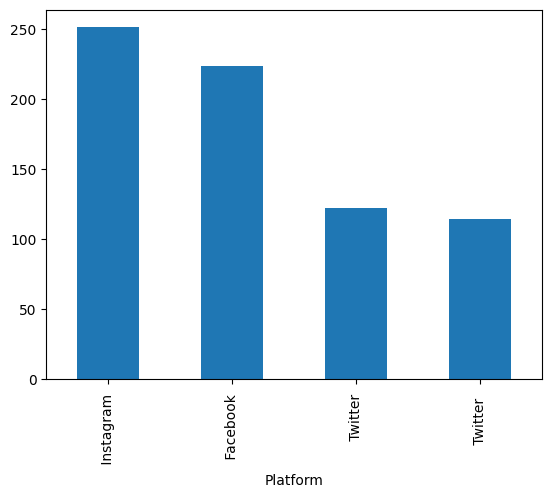

In [95]:
#split databse based on platform    

twitter = df[df['Platform'] == 'Twitter']
instagram = df[df['Platform'] == 'Instagram']
facebook = df[df['Platform'] == 'Facebook']

import matplotlib.pyplot as plt

#plotting the number of counts of platform based 

df['Platform'].value_counts().plot(kind='bar')



/var/folders/td/bwzm0ch95gv3n67hkws8_vwm0000gn/T/ipykernel_67438/2038342537.py:3: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  df.groupby('Platform').Likes.agg([len, min, max]).sort_values(by='len', ascending=False).plot(kind='bar')
/var/folders/td/bwzm0ch95gv3n67hkws8_vwm0000gn/T/ipykernel_67438/2038342537.py:3: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  df.groupby('Platform').Likes.agg([len, min, max]).sort_values(by='len', ascending=False).plot(kind='bar')


<Axes: xlabel='Platform'>

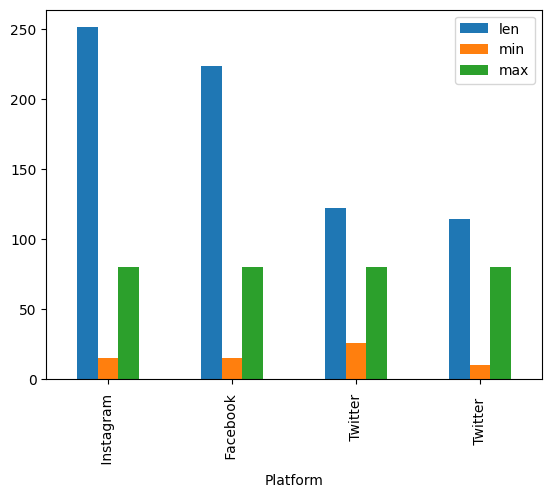

In [96]:
#plot likes of platform based

df.groupby('Platform').Likes.agg([len, min, max]).sort_values(by='len', ascending=False).plot(kind='bar')

In [78]:
pip install wordcloud

DEPRECATION: Loading egg at /Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/dlib-19.24.99-py3.12-macosx-10.9-universal2.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
Note: you may need to restart the kernel to use updated packages.


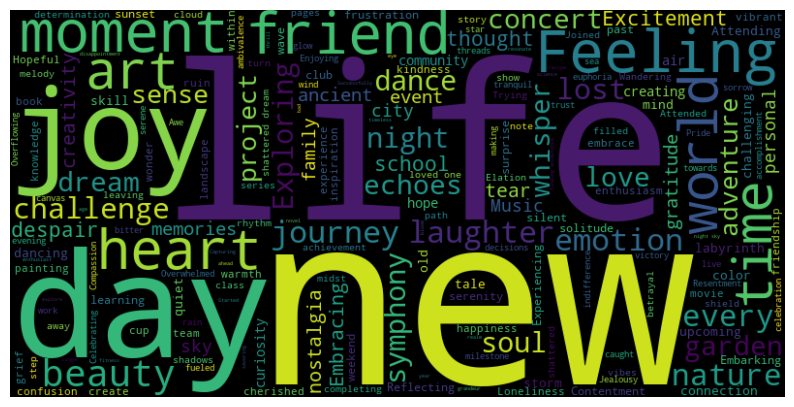

In [79]:
#Word Frequency and Text Analysis: Use natural language processing to identify common words, phrases, and topics, utilizing tools like word clouds or TF-IDF analysis.

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a list of words

text = df['Text'].values

# Join the list of words into a single string

text = ' '.join(text)

# Create the word cloud object

wordcloud = WordCloud(width=800, height=400).generate(text)

# Display the word cloud

plt.figure(figsize=(10,10))

plt.imshow(wordcloud, interpolation='bilinear')

plt.axis('off')

plt.show()



In [80]:
#unique values in the column 'sentiment'

len(df['Sentiment'].unique())

278

In [81]:
#unique values in the column 'processed_sentiment'

len(df['Sentiment'].unique())

278

In [82]:
#sentiment_group unique values
df['sentiment_group'].unique()


array(['positive', 'negative', 'neutral', 'fearful', 'disgusted', 'happy',
       'sad', 'surprised', 'angry'], dtype=object)

Data Preprocessing:

In [83]:
#Clean the text data by removing irrelevant information such as URLs, special characters, and emojis.

import re

def clean_text(text):
    text = re.sub(r'http\S+', '', text) #remove URLs
    text = re.sub(r'[^a-zA-Z\s]', '', text) #remove special characters
    text = text.encode('ascii', 'ignore').decode('ascii') #remove emojis
    return text

df['cleaned_text'] = df['Text'].apply(clean_text)

df.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour,processed_sentiment,sentiment_group,cleaned_text
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12,positive,positive,Enjoying a beautiful day at the park ...
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8,negative,negative,Traffic was terrible this morning ...
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15,positive,positive,Just finished an amazing workout
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18,positive,positive,Excited about the upcoming weekend getaway ...
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19,neutral,neutral,Trying out a new recipe for dinner tonight ...


In [84]:
pip install nltk

DEPRECATION: Loading egg at /Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/dlib-19.24.99-py3.12-macosx-10.9-universal2.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
Note: you may need to restart the kernel to use updated packages.


In [85]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Ensuring the necessary NLTK resources are downloaded
nltk.download('stopwords')
nltk.download('punkt')

# Load stopwords
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    # Tokenize the text
    words = word_tokenize(text)
    # Remove stopwords and convert words to lower case
    words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(words)

# Assuming 'df' is your DataFrame and it has a column 'cleaned_text' that contains text
df['cleaned_text'] = df['cleaned_text'].apply(remove_stopwords)

# Display the first few rows to verify the changes
df.head()


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/dabeer/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/dabeer/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour,processed_sentiment,sentiment_group,cleaned_text
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12,positive,positive,Enjoying beautiful day park
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8,negative,negative,Traffic terrible morning
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15,positive,positive,finished amazing workout
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18,positive,positive,Excited upcoming weekend getaway
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19,neutral,neutral,Trying new recipe dinner tonight


In [86]:
import nltk
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to /Users/dabeer/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [87]:
#Normalize the text by converting it to lowercase and lemmatizing or stemming words to reduce variation.

from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    words = word_tokenize(text)
    lemmatized_words = [lemmatizer.lemmatize(word.lower()) for word in words if word.lower() not in stop_words]
    return ' '.join(lemmatized_words)

df['lemmatized_text'] = df['cleaned_text'].apply(lemmatize_text)

In [88]:
df.head(10)


,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour,processed_sentiment,sentiment_group,cleaned_text,lemmatized_text
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12,positive,positive,Enjoying beautiful day park,enjoying beautiful day park
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8,negative,negative,Traffic terrible morning,traffic terrible morning
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15,positive,positive,finished amazing workout,finished amazing workout
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18,positive,positive,Excited upcoming weekend getaway,excited upcoming weekend getaway
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19,neutral,neutral,Trying new recipe dinner tonight,trying new recipe dinner tonight
5,5,5,Feeling grateful for the little things in lif...,Positive,2023-01-16 09:10:00,GratitudeNow,Twitter,#Gratitude #PositiveVibes,25.0,50.0,India,2023,1,16,9,positive,positive,Feeling grateful little things life,feeling grateful little thing life
6,6,6,Rainy days call for cozy blankets and hot coc...,Positive,2023-01-16 14:45:00,RainyDays,Facebook,#RainyDays #Cozy,10.0,20.0,Canada,2023,1,16,14,positive,positive,Rainy days call cozy blankets hot cocoa,rainy day call cozy blanket hot cocoa
7,7,7,The new movie release is a must-watch! ...,Positive,2023-01-16 19:30:00,MovieBuff,Instagram,#MovieNight #MustWatch,15.0,30.0,USA,2023,1,16,19,positive,positive,new movie release mustwatch,new movie release mustwatch
8,8,8,Political discussions heating up on the timel...,Negative,2023-01-17 08:00:00,DebateTalk,Twitter,#Politics #Debate,30.0,60.0,USA,2023,1,17,8,negative,negative,Political discussions heating timeline,political discussion heating timeline
9,9,9,Missing summer vibes and beach days. ...,Neutral,2023-01-17 12:20:00,BeachLover,Facebook,#Summer #BeachDays,18.0,35.0,Australia,2023,1,17,12,neutral,neutral,Missing summer vibes beach days,missing summer vibe beach day


In [89]:
#TF-IDF Analysis

from sklearn.feature_extraction.text import TfidfVectorizer

# Create the vectorizer object

vectorizer = TfidfVectorizer()

# Fit the vectorizer object to the text data

X = vectorizer.fit_transform(df['cleaned_text'])

# Create a DataFrame from the TF-IDF array

df_tfidf = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

#retain only the top 10 words

df_tfidf = df_tfidf.sum().sort_values(ascending=False).head(20)

df_tfidf

new           10.629767
feeling        7.409430
day            7.350626
like           6.324173
beauty         6.217815
night          5.973119
heart          5.741334
world          5.687189
laughter       5.545268
joy            5.436414
friends        5.361101
art            5.202479
journey        5.199251
personal       5.153783
excitement     5.142153
dreams         5.098968
life           5.022315
exploring      4.929503
lost           4.928925
lifes          4.864844
dtype: float64

More Feature Engineering

In [90]:
#bag of words model

from sklearn.feature_extraction.text import CountVectorizer

# Create the vectorizer object

vectorizer = CountVectorizer()

# Fit the vectorizer object to the text data

X = vectorizer.fit_transform(df['cleaned_text'])

# Create a DataFrame from the word count array

df_word_count = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Display the DataFrame

df_word_count.head()

,ablaze,abstract,abyss,academic,acceptance,accepts,accidentally,accomplished,accomplishing,accomplishment,...,yearbook,yearning,years,yet,york,young,zen,zero,zest,zestful
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [91]:
#choose the top 10 words

df_word_count.sum().sort_values(ascending=False).head(20)

new          43
like         27
feeling      26
day          26
heart        23
night        22
joy          22
world        21
art          21
beauty       20
dreams       20
journey      20
laughter     20
life         19
every        19
symphony     17
friends      17
sky          17
exploring    17
lost         17
dtype: int64

In [92]:
from nltk import ngrams
from nltk.tokenize import word_tokenize

def generate_ngrams(text, n=2):
    tokens = word_tokenize(text)
    n_grams = ngrams(tokens, n)
    return [' '.join(grams) for grams in n_grams]

# Applying n-grams function to the 'text' column
df['bigrams'] = df['Text'].apply(generate_ngrams)

# Output the DataFrame
print(df[['Text', 'bigrams']])

                                                  Text  \
0     Enjoying a beautiful day at the park!        ...   
1     Traffic was terrible this morning.           ...   
2     Just finished an amazing workout! 💪          ...   
3     Excited about the upcoming weekend getaway!  ...   
4     Trying out a new recipe for dinner tonight.  ...   
..                                                 ...   
727  Collaborating on a science project that receiv...   
728  Attending a surprise birthday party organized ...   
729  Successfully fundraising for a school charity ...   
730  Participating in a multicultural festival, cel...   
731  Organizing a virtual talent show during challe...   

                                               bigrams  
0    [Enjoying a, a beautiful, beautiful day, day a...  
1    [Traffic was, was terrible, terrible this, thi...  
2    [Just finished, finished an, an amazing, amazi...  
3    [Excited about, about the, the upcoming, upcom...  
4    [Trying out, 

In [93]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour,processed_sentiment,sentiment_group,cleaned_text,lemmatized_text,bigrams
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12,positive,positive,Enjoying beautiful day park,enjoying beautiful day park,"[Enjoying a, a beautiful, beautiful day, day a..."
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8,negative,negative,Traffic terrible morning,traffic terrible morning,"[Traffic was, was terrible, terrible this, thi..."
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15,positive,positive,finished amazing workout,finished amazing workout,"[Just finished, finished an, an amazing, amazi..."
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18,positive,positive,Excited upcoming weekend getaway,excited upcoming weekend getaway,"[Excited about, about the, the upcoming, upcom..."
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19,neutral,neutral,Trying new recipe dinner tonight,trying new recipe dinner tonight,"[Trying out, out a, a new, new recipe, recipe ..."
